# PROJECT: tmdb DATASET INVESTIGATION

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
The data for this project is collected from The Movie database(TMDB) which holds the data about 10,000 movies. The data includes information about the cast, revenue, votes, production companies, etc.. Most part of the investigation studies the revenue based on other variables. 

The following questions have been formulated for analyzing the data in this dataset-

1- Investigate the relationship between the movie cast and the revenue earned.Do the movies with high revenue also have high viewer votes? 

2- Study the relationship between movie genres and revenue earned. What is the correlation between earnings and viewer votes? 
 

In [78]:
#import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline    

<a id='wrangling'></a>
## Data Wrangling

In this section, we load our data to explore it and clean it. 

In [79]:
df = pd.read_csv('tmdb-movies.csv')
#df.head()

In [80]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [81]:
df.info()  #describes the column data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [82]:
df.isnull().sum() #total null values in each column

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [83]:
#DROP UNNECESSARY COLUMNS WITH NULL VALUES
df.drop(['imdb_id','homepage','tagline', 'keywords'], axis =1, inplace = True)

In [84]:
df.dropna(subset=['cast', 'genres','budget_adj','revenue_adj'], inplace=True)

In [85]:
sum(df.duplicated())  #find duplicates

1

In [86]:
df.drop_duplicates(inplace=True)  #drop duplicate values

In [87]:
sum(df.duplicated())

0

# What does the data look like so far?

Our dataset is called 'tmdb-movies', so our first step is to load the data. We load the data as a pandas dataframe. Before we do our statistical operations we first check the column labels we have so that we know what our variables are. We then get the info of all columns which tells us the type of the data in each column, number of values and how many rows and columns we have. 

Finding null values is a very important part of data wrangling. We need to clean our data of the null values so we first find the null values in each column. There are four variables that we don't need for our investigation and they have a lot of null values so we drop those columns to further clean the data. 'cast' and 'genres' are two columns that we will be using and they also have null values, so we drop the rows with null values too for this study. Alternatively, we would have replaced the null values with the mean of the column values but the data type for both these columns is 'object' data type, hence, the mean cannot be calculated. 

Next, we check for the duplicate values in the dataset, which turns out to be just 1, and we drop the duplicate values. 

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1-
What is the relationship between cast and earnings? Does a certain combination of actors seem to generate more revenue? 


In [88]:
actor_movies = defaultdict(int)      #reading actors and revenue values into a dictionary
actor_revenue = defaultdict(int)
for i in range(df.shape[0]):          #loop to go over each row and select cast names and save in dict above
    actors = df['cast'].iloc[i].split('|')
    for actor in actors:
        actor_movies[actor] += 1      #adds actor to dictionary
        actor_revenue[actor] += df['revenue_adj'].iloc[i]    #adds revenue earned by actor in revenue dictionary

In [89]:
actor_movies = pd.Series(actor_movies)
actor_revenue = pd.Series(actor_revenue)    #converting dictionaries to series

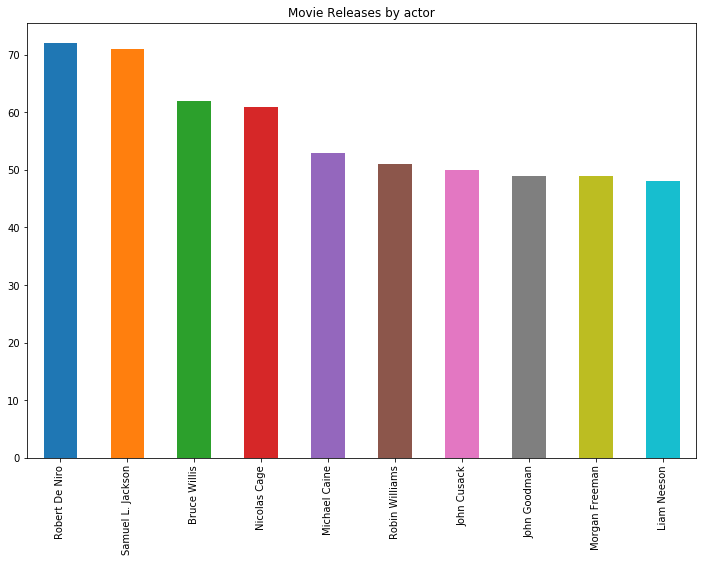

In [90]:
#sort actors according to number of releases and plot top 10 in a bar chart
actor_movies.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,8), title ='Movie Releases by actor')


This bar chart shows the top 10 actors according to the number of releases. The data is sorted so the plot goes from highest to lowest from left to right. 

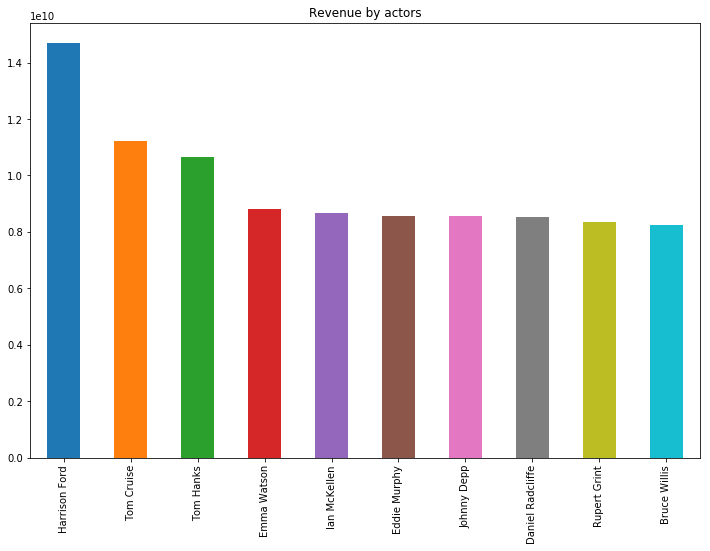

In [91]:
#sort revenue and plot top 10 revenue earning actors
actor_revenue.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,8), title = 'Revenue by actors')

This chart shows the top 10 actors according to their revenue generation. Harrison Ford is the highest revenue generating actor followed by Tom Cruise and Tom Hanks. 

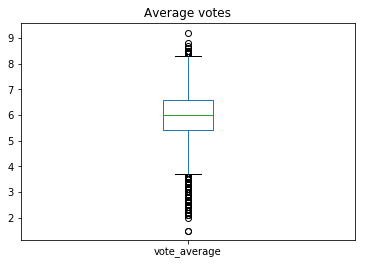

In [92]:
df['vote_average'].plot('box', title = 'Average votes')  #box plot showing average votes

Average number of votes showing the spread of votes. The central measures seem to be between 3 and 5. 

Text(0,0.5,'Number of votes')

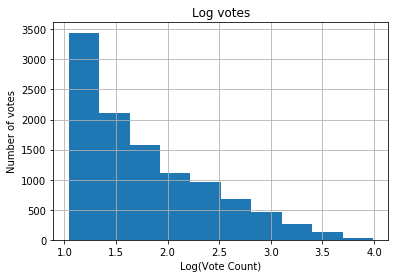

In [93]:
(np.log10(df['vote_count']+1)).hist().set_title('Log votes')  #using log for better interpretation of votes
plt.xlabel('Log(Vote Count)')
plt.ylabel('Number of votes')

This histogram showing the log of vote count shows the number of votes cast by the viewers. We log these values to be able to view the spread better. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

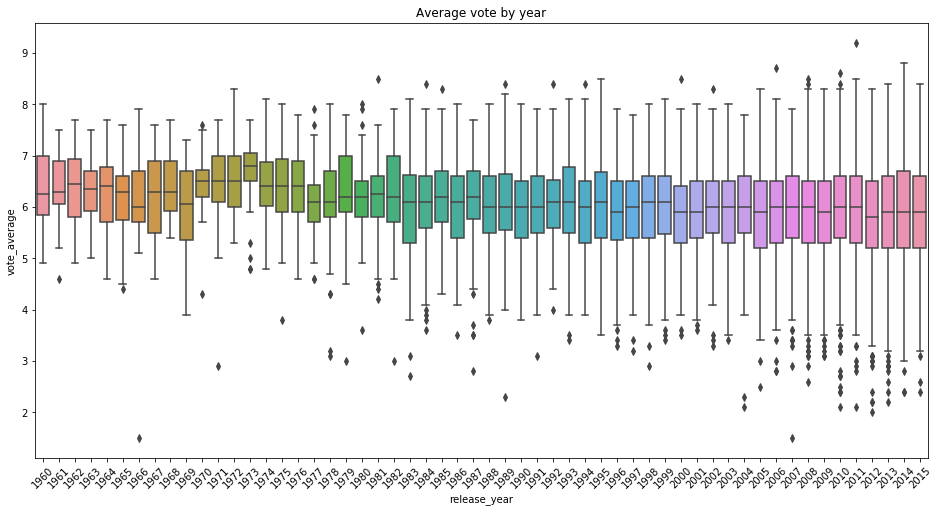

In [94]:
plt.figure(figsize=(16,8))   #plot average votes over the years
sns.boxplot(x="release_year", y="vote_average", data=df).set_title('Average vote by year')
plt.xticks(rotation=45)

These boxplots show the spread of the average votes over the years. In the recent years we have seen an increase in the number of user votes. 

## The Process:

The first step before we answer the question is to extract the name of actors from the 'cast' column. The names of actors are separated by a vertical bar '|' so we create a loop that goes over each row and saves the cast names in a dictionary called 'actor_movies'. We use the defaultdict module from collections package as this will initialize a value even if the row is empty. We also create a dictionary with the adjusted revenues earned by these actors and convert both these dictionaries into a panda Series. 

Then we start plotting our values with the top 10 actors with most releases. We also plot the top 10 earning actors. We sort the series with actors generating highest values all the way to the lowest and pick the top 10 and plot them. 

Additionally, we also explore the yearly voting average. We first do a boxplot of the votes showing the measures of spread over the years. Then for a better readability we take a log of the vote count to get a better picture of how many votes have been cast. Using seaborn we do another boxplot of based on the release year and vote average. 

## RESEARCH QUESTION 2

Study the relationship between movie genres and revenue earned. What is the correlation between earnings and viewer votes?


In [95]:
genre_movies = defaultdict(int)  #reading genre and respective revenue earned into a dictionary
genre_revenue = defaultdict(int)
for i in range(df.shape[0]):
    genres = df['genres'].iloc[i].split('|') #go over rows
    for genre in genres:
        genre_movies[genre] += 1
        genre_revenue[genre] += df['revenue_adj'].iloc[i]

In [96]:
genre_movies = pd.Series(genre_movies)  #convert to series
genre_revenue = pd.Series(genre_revenue)

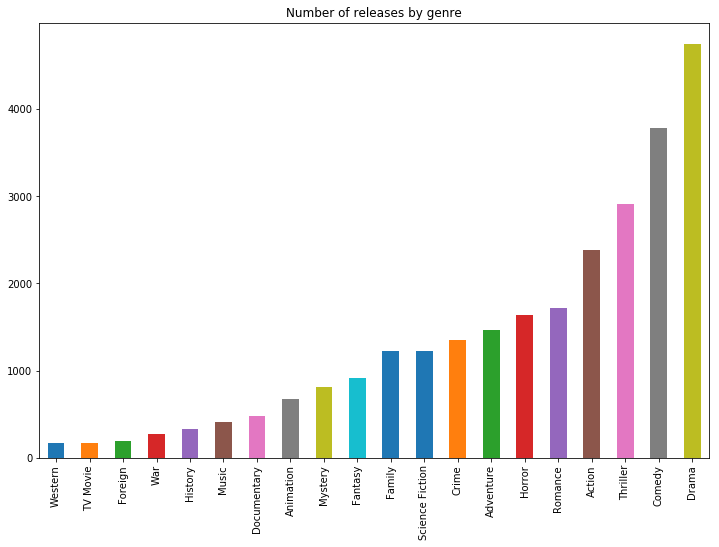

In [97]:
#sort according to most number of movies released and plot all genres
genre_movies.sort_values().plot(kind='bar',figsize =(12,8), title = 'Number of releases by genre')

This boxplot shows the number of movie releases by genre. It shows that most of the movies released belong to the drama genre and the least productions belong to the Western genre. 

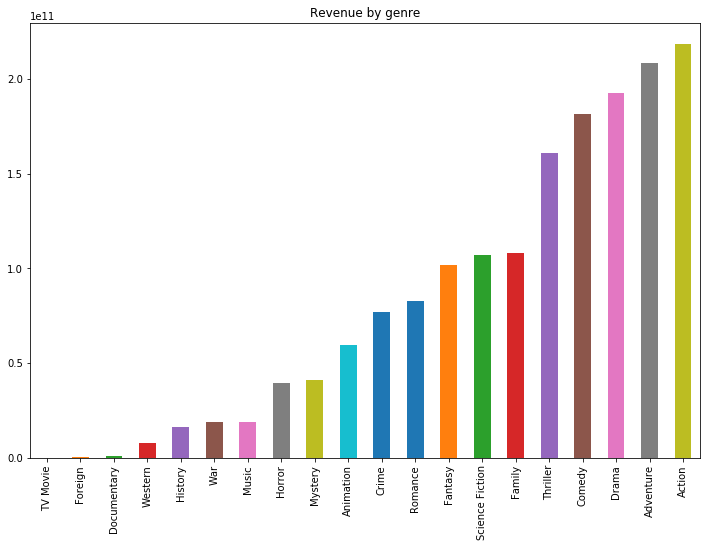

In [98]:
#plot revenue earned by each genre
genre_revenue.sort_values().plot(kind='bar',figsize =(12,8),title = 'Revenue by genre')

This bar chart shows the highest grossing movie genres. Action movies seem to be the highest revenue generating genre. 

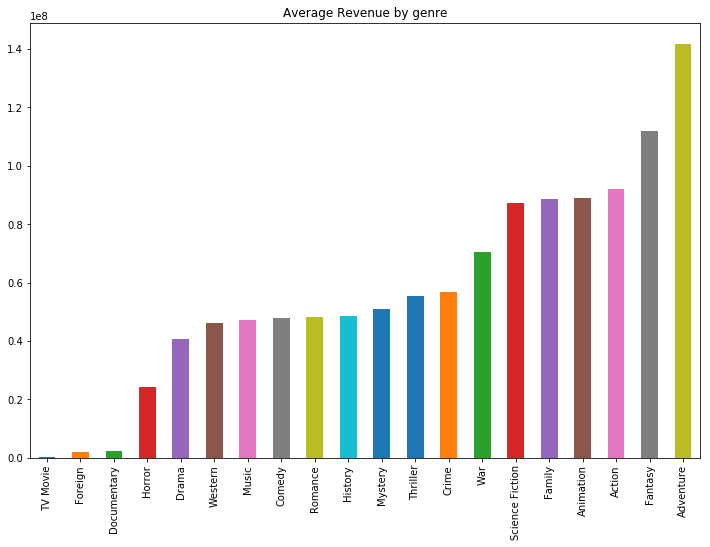

In [99]:
#calculate the average revenue by each genre and plot. 
#averages provide a better insight
genre_avg = genre_revenue/genre_movies
genre_avg.sort_values().plot(kind='bar',figsize =(12,8),title = 'Average Revenue by genre')

To get a picture of the revenue generated by the different genres we get the average revenue and then we plot it. It is evident that adventure movies generate the highest revenue. 

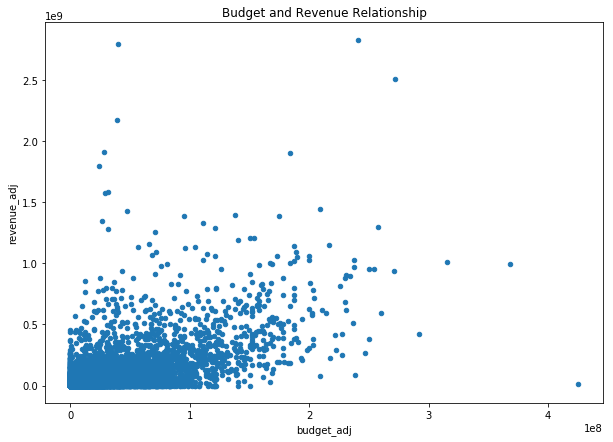

In [100]:
df.plot.scatter(x='budget_adj', y='revenue_adj', figsize=(10,7), title = 'Budget and Revenue Relationship')

This scatterplot shows the correlation between adjusted budget and adjusted revenue. It's not a linear or strong correlation but rather a moderate one. 

In [101]:
mycor = df.corr()  #correlation of various variables in the dataframe

In [102]:
mycor

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.010942,-0.139709,-0.098027,-0.087070,-0.033663,-0.068391,0.510418,-0.187642,-0.137569
popularity,-0.010942,1.000000,0.544585,0.662994,0.136811,0.800690,0.215569,0.091988,0.512503,0.608585
budget,-0.139709,0.544585,1.000000,0.734608,0.190089,0.632257,0.085600,0.117943,0.968903,0.622005
revenue,-0.098027,0.662994,0.734608,1.000000,0.162411,0.790971,0.176881,0.058350,0.706086,0.919022
runtime,-0.087070,0.136811,0.190089,0.162411,1.000000,0.163064,0.171845,-0.120767,0.220153,0.175354
vote_count,-0.033663,0.800690,0.632257,0.790971,0.163064,1.000000,0.258684,0.109502,0.586516,0.707638
vote_average,-0.068391,0.215569,0.085600,0.176881,0.171845,0.258684,1.000000,-0.125167,0.098039,0.197708
release_year,0.510418,0.091988,0.117943,0.058350,-0.120767,0.109502,-0.125167,1.000000,0.018411,-0.065509
budget_adj,-0.187642,0.512503,0.968903,0.706086,0.220153,0.586516,0.098039,0.018411,1.000000,0.646125
revenue_adj,-0.137569,0.608585,0.622005,0.919022,0.175354,0.707638,0.197708,-0.065509,0.646125,1.000000


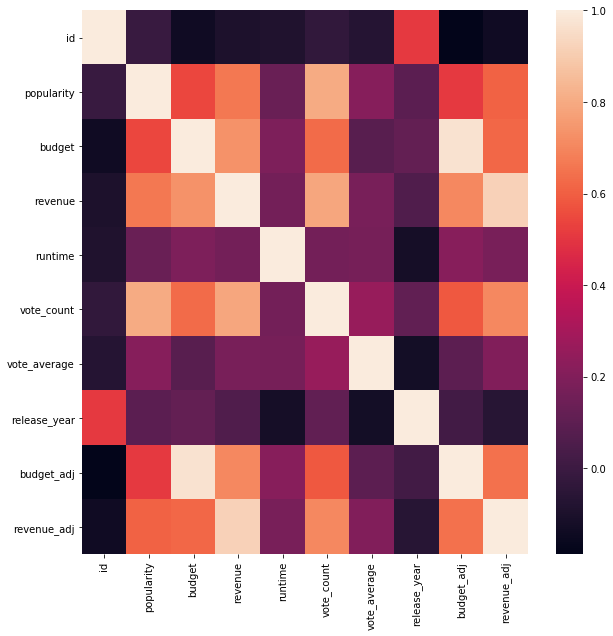

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(mycor)

This heatmap shows the correlation between various variables. The darker the colors the weaker the correlation. 


## The Process:

The 'genres' column is the same as 'cast' column with data separated by '|', hence, we repeat the same process to extract the data and put it in a dictionary. Here, instead of plotting top earning genres we plot all the genres and how many releases each had and how much they earned. 

In the first plot, we draw a bar diagram of the number of releases for each genre. Then we plot the revenue earned by each of those genres. To get a more accurate information about the revenue we take the genre average by dividing the genre revenue by the movies, then we plot this average revenue. 

Additionally, we also do a scatterplot and a table of adjusted budget and adjusted revenue and use a seaborn correlation heatmap for a better visual. 

<a id='conclusions'></a>
## Conclusions

We can infer a number of things from the analysis done above. 
Actor Robert de Niro has the highest earnings amongst all actors in the dataset, however, the actor who generated the highest revenue is Harrison Ford. This shows that the number of movies an actor does is not necessarily related to the amount of money their movies make. For example, Emma Watson has starred in much less movies than Nicholas Cage, but still stands fourth in revenue generation. 
 
We have also studied the average number of votes over the years, average number of votes has remained more or less similar over the years except recently where we see the number of votes cast have increased in number. 

In our study about the genres and their respective revenues we see that the highest number of movies released were in the genre of drama and the lowest were western. The highest number of revenue was generated by action movies. Although we will have a more accurate estimate of revenue generation when we take the average. So we take the average and find that the highest revenue generating genre is adventure. 

The scatterplot of adjusted budget and adjusted revenue shows a fairly linear or positive correlation between both variables. However, this does not imply causation. Movies with low budgets also have some of the highest revenues. A relationship between all the quantitative variables can also be seen in the correlation table and the heatmap. Lighter shades imply higher correlation. The limitation however are variables like id, runtime, release year, etc. as these variables do not affect the revenue or the budget. For example, id can be understood to be the key to which all the values related to a movie are associated. 

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255